# solution / analysis hypothesis 

In [11]:
# a busines can be said to succeed in two ways that is if the number of orders increase might indicate it has reached out to 
# more people which is entirely good even if the order quantity doesnt increase
# the second way is if the order quantity increase 
# so the question is what is the relationship between the amount actually being shipped and the number of orders being recieved 

In [502]:
import pandas as pd 
import tkinter as t
import numpy as np 
import datetime as dt
from pandas import datetime
import os 
from pandas_profiling import ProfileReport
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy import stats
import pylab
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
#import statsmodels.graphics.tsaplots as plot_acf, plot_pacf
import seaborn as sns
from prophet import Prophet
from pandas.plotting import autocorrelation_plot
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
from datetime import date
from dateutil.easter import easter
from dateutil.relativedelta import relativedelta as rd
from holidays.constants import JAN, MAY, JUL, SEP, OCT, NOV, DEC
from holidays.holiday_base import HolidayBase

In [453]:
os.chdir(r"C:\Users\aokelo\OneDrive - DPDHL\Desktop\TIME_SE")

In [454]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

## IMPORT  DATA

In [455]:
order_num = pd.read_csv('ord_num.csv', parse_dates = True, header = 0,sep=';',   squeeze = True,date_parser=parser)
order_qnt = pd.read_csv('order_Qnt.csv', parse_dates = True, header = 0,sep=';',squeeze = True,date_parser=parser)
date = pd.read_csv('date.csv', parse_dates = True, header = 0, squeeze = True,date_parser=parser,)

## peck at the data 

In [456]:
#order_num.head()

In [457]:
#order_qnt.head(3)


In [459]:
#date.head(4)

### converting dates to date format

In [460]:
order_num['Date'] = pd.to_datetime(order_num['ADDDTE'])
#order_num.head(4)

In [461]:
order_qnt['Date'] = pd.to_datetime(order_qnt['ENTDTE'])
#order_qnt.head(4)

In [462]:
date['Date'] = pd.to_datetime(date['DATE'])
#date.head(4)

## Normalizing to drop the time 

In [463]:
order_qnt['date'] = pd.DatetimeIndex(order_qnt.Date).normalize()
order_num['date'] = pd.DatetimeIndex(order_num.Date).normalize()
date['date'] = pd.DatetimeIndex(date.Date).normalize()
#date.head(3)

In [464]:
 ##droping un needed colums for now

In [465]:
order_qnt1 =order_qnt.drop(['ENTDTE', 'Date'],axis = 1)
#order_qnt1.head(4)

In [466]:
order_num1 =order_num.drop(['ST_ADR_ID','ADDDTE', 'Date'], axis = 1)
#order_num1.head(13)

In [467]:
#date =date.drop('DATE', axis = 1)
#date.head(3)

#### grouping count of oders by day

In [468]:
order_num2 = order_num1.groupby(["date"], as_index=False).count()
#order_num2.head(5)

In [469]:
order_qnt2 = order_qnt1.groupby(["date"], as_index=False).sum()
#order_qnt2.head(3)

In [287]:
##changing  date column names 

In [470]:
#order_qnt2['date'].dt.date
#order_qnt2

In [471]:
##changing date to index
order_qnt3 = order_qnt2.set_index('date')
order_num3 = order_num2.set_index('date')
#order_num3.head(3)

In [472]:
order_num4 = pd.merge(date,order_num3, on= 'date', how='left')
order_num4.dropna(how= 'any')
#order_num4.head(3)

,DATE,DAY_OF_WEEK,QUARTER,MONTH,Date,date,ORDNUM
680,2019-04-24T00:00:00.0000000,2,2,4,2019-04-24,2019-04-24,660.0
681,2019-04-25T00:00:00.0000000,3,2,4,2019-04-25,2019-04-25,433.0
682,2019-04-26T00:00:00.0000000,4,2,4,2019-04-26,2019-04-26,171.0
683,2019-04-27T00:00:00.0000000,5,2,4,2019-04-27,2019-04-27,51.0
684,2019-04-28T00:00:00.0000000,6,2,4,2019-04-28,2019-04-28,76.0
...,...,...,...,...,...,...,...
7121,2021-11-26T00:00:00.0000000,4,4,11,2021-11-26,2021-11-26,8911.0
7122,2021-11-27T00:00:00.0000000,5,4,11,2021-11-27,2021-11-27,3651.0
7123,2021-11-28T00:00:00.0000000,6,4,11,2021-11-28,2021-11-28,3362.0
7124,2021-11-29T00:00:00.0000000,0,4,11,2021-11-29,2021-11-29,3509.0


In [477]:
orders_merge = pd.merge(order_num4,order_qnt3,on= 'date', how='right')
orders_merge.dropna(how= 'any')
#orders_merge.head(3)

,DATE,DAY_OF_WEEK,QUARTER,MONTH,Date,date,ORDNUM,ORDQTY
0,2018-03-13T00:00:00.0000000,1,1,3,2018-03-13,2018-03-13,66.0,2491
1,2018-03-14T00:00:00.0000000,2,1,3,2018-03-14,2018-03-14,95.0,1398
2,2018-03-15T00:00:00.0000000,3,1,3,2018-03-15,2018-03-15,39.0,156
3,2018-03-16T00:00:00.0000000,4,1,3,2018-03-16,2018-03-16,5.0,111
4,2018-03-19T00:00:00.0000000,0,1,3,2018-03-19,2018-03-19,171.0,816
...,...,...,...,...,...,...,...,...
1117,2022-01-12T00:00:00.0000000,2,1,1,2022-01-12,2022-01-12,1945.0,107570
1118,2022-01-13T00:00:00.0000000,3,1,1,2022-01-13,2022-01-13,2672.0,30360
1119,2022-01-14T00:00:00.0000000,4,1,1,2022-01-14,2022-01-14,3042.0,82204
1120,2022-01-15T00:00:00.0000000,5,1,1,2022-01-15,2022-01-15,979.0,801


In [474]:
orders_merge.describe()

,DAY_OF_WEEK,QUARTER,MONTH,ORDNUM,ORDQTY
count,1124.000000,1124.000000,1124.000000,1122.000000,1.124000e+03
mean,2.814057,2.603203,6.785587,809.863636,5.784680e+04
std,1.952266,1.088689,3.409082,937.632251,1.059030e+05
min,0.000000,1.000000,1.000000,1.000000,0.000000e+00
25%,1.000000,2.000000,4.000000,413.250000,4.371500e+03
50%,3.000000,3.000000,7.000000,671.000000,2.058600e+04
75%,4.000000,4.000000,10.000000,975.000000,6.759925e+04
max,6.000000,4.000000,12.000000,15642.000000,1.208736e+06


In [293]:
#orders_merge.ORDNUM.hist()

### spliting date column to year month and date

In [478]:
orders_merge['Year'] = orders_merge['Date'].dt.year
orders_merge['Month']= orders_merge['Date'].dt.month
orders_merge['Day']= orders_merge['Date'].dt.day
#orders_merge.head(3)

## Ploting the data (Decriptive analysis)

#### weekly analysis number of orders

Text(0.5, 1.0, 'avg_order_numbers')

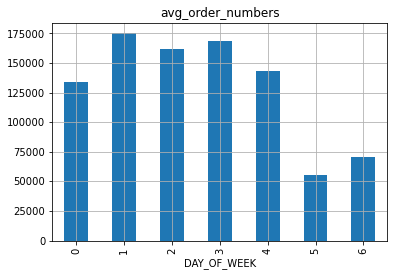

In [295]:
weekly_orders = orders_merge.groupby(['DAY_OF_WEEK'])['ORDNUM'].sum()
weekly_orders.plot(kind = 'bar',grid = True)
plt.title('avg_order_numbers')


In [296]:
## the above is number of orders on each day of the week

#### weekly analysis quantity of orders

Text(0.5, 1.0, 'avg_order_qnt')

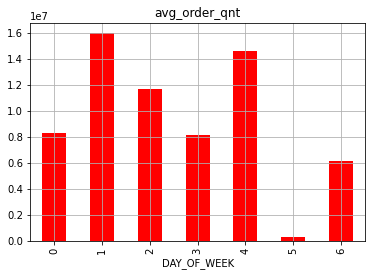

In [297]:
weekly_orders_q = orders_merge.groupby(['DAY_OF_WEEK'])['ORDQTY'].sum()
weekly_orders_q.plot(kind = 'bar',grid = True,color = 'r' )
plt.title('avg_order_qnt')

#### Monthly analysis of order_num

Text(0.5, 1.0, 'avg_order_numbers')

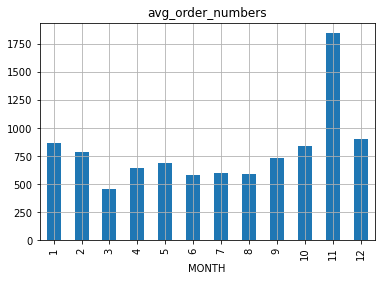

In [298]:
monthly_orders = orders_merge.groupby(['MONTH'])['ORDNUM'].mean()
monthly_orders.plot(kind = 'bar',grid = True )
plt.title('avg_order_numbers')

#### Monthly analysis of order_quantity

Text(0.5, 1.0, 'avg_order_qnt')

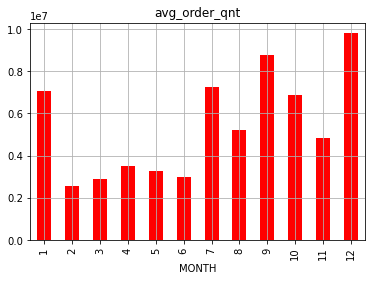

In [299]:
monthly_orders_q = orders_merge.groupby(['MONTH'])['ORDQTY'].sum()
monthly_orders_q.plot(kind = 'bar',grid = True, color = 'r' )
plt.title('avg_order_qnt')

#### yearly analysis order quantity

Text(0.5, 1.0, 'order_qnt')

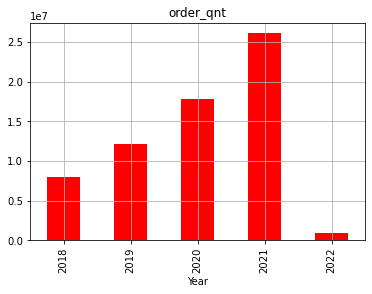

In [300]:
yearly_ordersq = orders_merge.groupby(['Year'])['ORDQTY'].sum()
yearly_ordersq.plot(kind = 'bar',grid = True,color = 'r' )
plt.title('order_qnt')

#### yearly analysis order numbers

Text(0.5, 1.0, 'order_numbers')

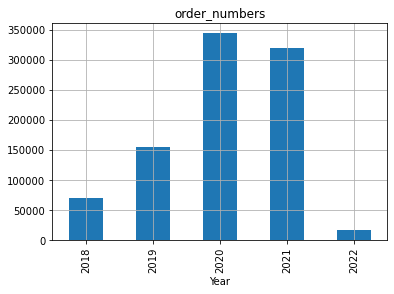

In [301]:
yearly_orders = orders_merge.groupby(['Year'])['ORDNUM'].sum()
yearly_orders.plot(kind = 'bar',grid = True )
plt.title('order_numbers')
#yearly_orders.get_group(2021)

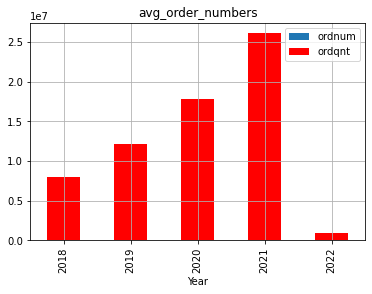

In [302]:
yearly_orders = orders_merge.groupby(['Year'])['ORDNUM'].sum()
yearly_orders.plot(kind = 'bar',grid = True )
yearly_ordersq.plot(kind = 'bar',grid = True,color = 'r' )
plt.title('avg_order_numbers')
plt.legend(['ordnum', 'ordqnt'])

#### seasonal analysis number of orders

Text(0.5, 1.0, 'avg_order_numbers')

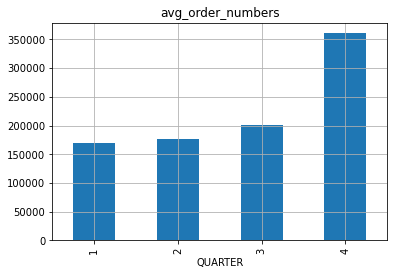

In [303]:
quarter_data = orders_merge.groupby(['QUARTER'])['ORDNUM'].sum()
quarter_data.plot(kind = 'bar',grid = True )
plt.title('avg_order_numbers')

#### seasonal analysis quantity of orders

Text(0.5, 1.0, 'avg_order_qnt')

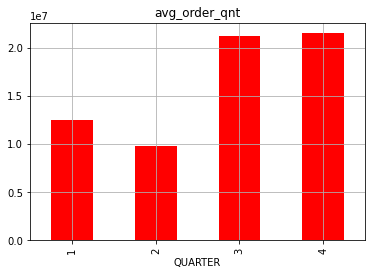

In [304]:
quarter_data_q= orders_merge.groupby(['QUARTER'])['ORDQTY'].sum()
quarter_data_q.plot(kind = 'bar',grid = True,color = 'r' )
plt.title('avg_order_qnt')

Text(0.5, 1.0, 'order_num')

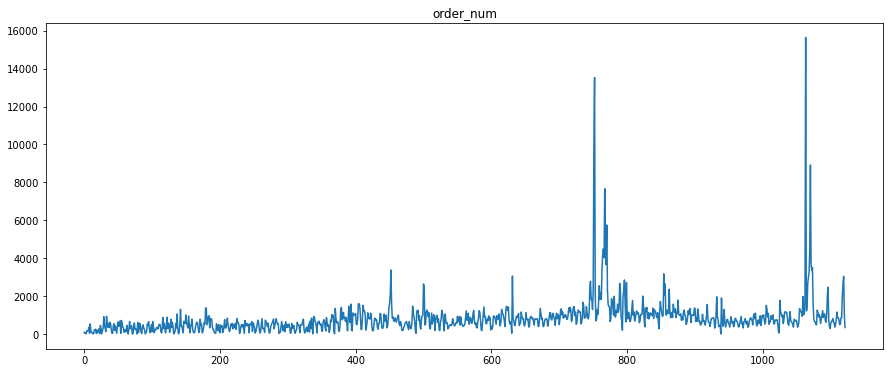

In [305]:
plt.figure(figsize=(15, 6))
plt.plot(orders_merge.ORDNUM)
plt.title('order_num')

Text(0.5, 1.0, 'order_qnt')

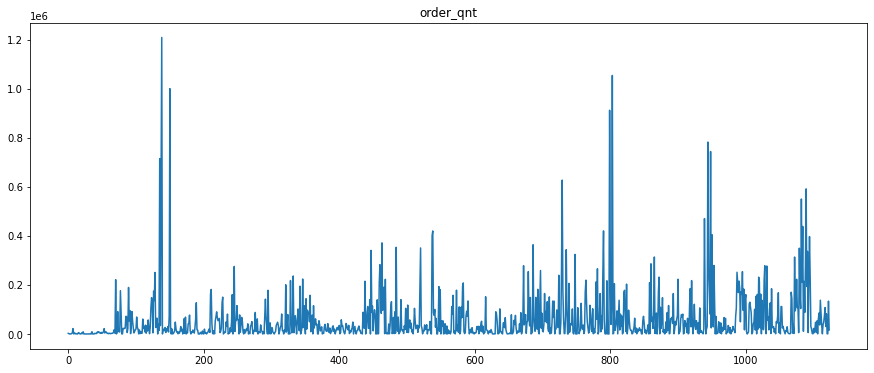

In [306]:
plt.figure(figsize=(15, 6))
plt.plot(orders_merge.ORDQTY)
plt.title('order_qnt')

In [307]:
# our graph is hard to visualize because of outliers in our data ie some days have extreme numbers. this is sorted later 

In [479]:
#sns.distplot(orders_merge.ORDNUM)

In [309]:
# above is checking the general distribution of our data and we see that most orders are in range(0,2000)

## Into the timeverse (time-series_ analysis)

### QQ plot 

In [310]:
## helps us know how our data is distributed weither normally or not 

((array([-3.23113944, -2.96847645, -2.82206287, ...,  2.82206287,
          2.96847645,  3.23113944]),
  array([1.0000e+00, 1.0000e+00, 3.0000e+00, ..., 1.5642e+04,        nan,
                nan])),
 (nan, nan, nan))

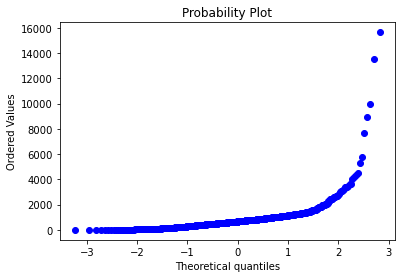

In [311]:
scipy.stats.probplot(orders_merge.ORDNUM, plot = pylab)

In [480]:
order_merge1 = orders_merge.drop(['Date','DATE','DAY_OF_WEEK','QUARTER','Year','MONTH','Day','Month'], axis = 1)
#order_merge1.head()

In [481]:
order_merge1 = order_merge1.set_index('date')
#order_merge1.head(3)

## setting frequency

In [314]:
order_merge1.index

DatetimeIndex(['2018-03-13', '2018-03-14', '2018-03-15', '2018-03-16',
               '2018-03-19', '2018-03-20', '2018-03-21', '2018-03-22',
               '2018-03-23', '2018-03-26',
               ...
               '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
               '2022-01-17', '2022-01-18'],
              dtype='datetime64[ns]', name='date', length=1124, freq=None)

In [482]:
order_merge1 =order_merge1.asfreq('d', method ='pad')
order_merge1 = order_merge1.dropna(how= 'any')


In [316]:
order_merge1.describe()

,ORDNUM,ORDQTY
count,1406.000000,1.406000e+03
mean,886.496444,5.547351e+04
std,1435.535996,1.044770e+05
min,1.000000,0.000000e+00
25%,392.250000,3.088000e+03
50%,651.000000,1.817000e+04
75%,957.000000,6.346000e+04
max,15642.000000,1.208736e+06


## stationarity

In [317]:
#A time series is said to be “stationary” if it has no trend,
#exhibits constant variance over time, and has a constant autocorrelation structure over time.
#

In [483]:
stat1 = order_merge1.drop('ORDQTY', axis = 1)
stat2 =  order_merge1.drop('ORDNUM', axis = 1)
#stat2.head(4)

In [484]:
#removing outliers to plot our values and see the general distribution

Text(0.5, 1.0, 'ORDNUM')

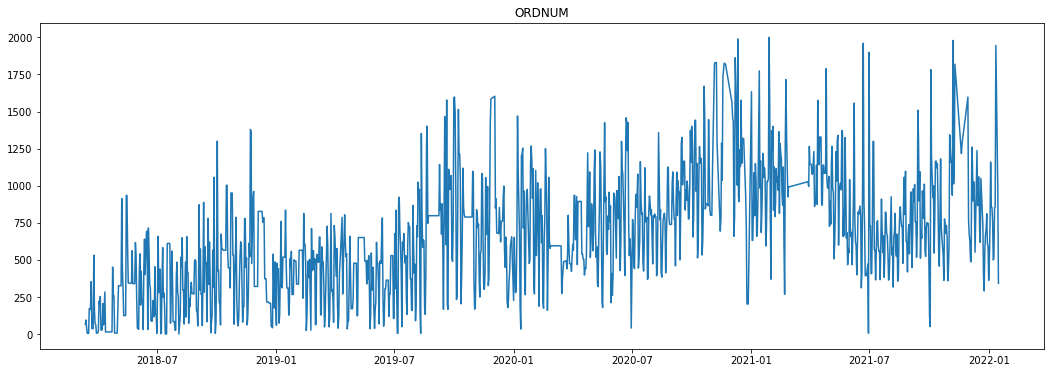

In [485]:
#stat1.plot()
x =stat1[ stat1["ORDNUM"]<2000]
plt.figure(figsize=(18, 6))
plt.plot(x)
plt.title('ORDNUM')


Text(0.5, 1.0, 'ORDQTY')

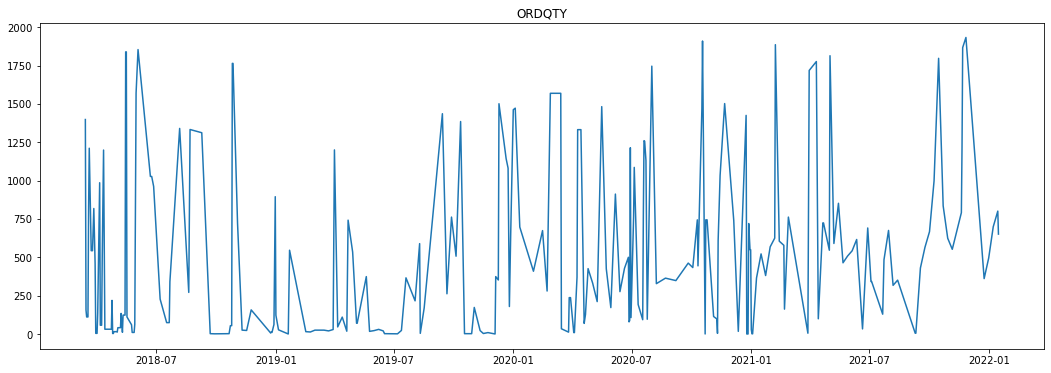

In [486]:
y =stat2[ stat2["ORDQTY"]<2000]
plt.figure(figsize=(18, 6))
plt.plot(y)
plt.title('ORDQTY')


In [487]:
## just from the above graphs we can see that our data is stationary and has no trend but we can verify by adfuller test

In [488]:
adfuller(stat1)

(-6.802139320178886,
 2.22315807601669e-09,
 15,
 1390,
 {'1%': -3.435063249907377,
  '5%': -2.863621558824986,
  '10%': -2.567878216448424},
 22206.570544727118)

In [489]:
adfuller(stat2)

(-5.92598341061186,
 2.44315404568742e-07,
 20,
 1385,
 {'1%': -3.435080296942406,
  '5%': -2.863629081525758,
  '10%': -2.567882222497361},
 35631.853820027376)

In [490]:
"""""
from the above Adf test our stat value is lower than the critical values and our p value lower than 0.5 showing that our data
is stationary 
"""""

'""\nfrom the above Adf test our stat value is lower than the critical values and our p value lower than 0.5 showing that our data\nis stationary \n'

In [326]:
## again verifying if there is a trend or seasonality by decomposition

## seasonality and trends in our data

Text(0.5, 1.0, 'num')

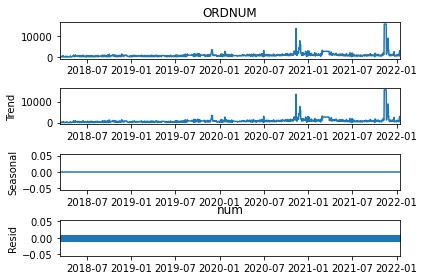

In [327]:
seasonal_dec = seasonal_decompose(x = order_merge1['ORDNUM'], model='additive', extrapolate_trend='freq', period=1)
seasonal_dec.plot()
plt.title('num')

Text(0.5, 1.0, 'quant')

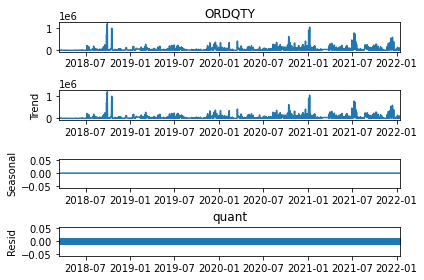

In [328]:
seasonal_dec = seasonal_decompose(x = order_merge1['ORDQTY'], model='additive', extrapolate_trend='freq', period=1)
seasonal_dec.plot()
plt.title('quant')

In [329]:
"""""
now that we know if about stationarity lets chaeck on outo correlation which is to find out if 
the orders numbers are related to their previous values
"""""

'""\nnow that we know if about stationarity lets chaeck on outo correlation which is to find out if \nthe orders numbers are related to their previous values\n'

In [330]:
## ok our data is stationary but is there any correlation in that the number of orders yesterday is related to orders on 
# previous day and so on 

## Autocorrelation

In [331]:
#sgt.plot_acf(stat1, lags = 50,zero = False)
#plt.title('ORDQTY_correlation')

In [376]:
#sgt.plot_acf(stat2, lags = 50,zero = False)
#plt.title('ORDNUM_correlation')

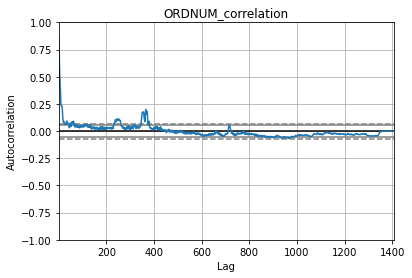

In [377]:
autocorrelation_plot(order_merge1['ORDNUM'])
plt.title('ORDNUM_correlation')
plt.show()

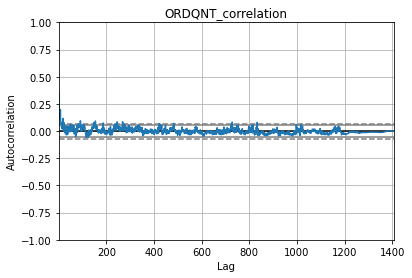

In [378]:
autocorrelation_plot(order_merge1['ORDQTY'])
plt.title('ORDQNT_correlation')
plt.show()

## Training using Arima model

## Arima forecast 

In [243]:
## finding best arima order 

In [246]:
ord_qnt_o = auto_arima(stat2, trace = True, supress_warning = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=36842.224, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=36642.568, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=36349.584, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=36840.224, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=36286.266, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=36278.676, Time=0.82 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=36284.827, Time=0.90 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=36286.500, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=36265.652, Time=1.34 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.66 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=36282.959, Time=2.53 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=3

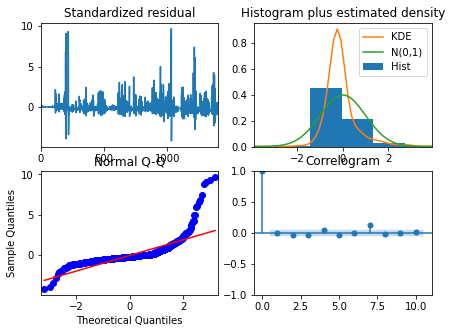

In [513]:
ord_qnt_o.plot_diagnostics(figsize=(7,5))
plt.show()

In [244]:
ord_num_o = auto_arima(stat1, trace = True, supress_warning = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22771.120, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22770.192, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22768.536, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22769.121, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=22717.091, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.38 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=22710.202, Time=0.30 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.13 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=22709.583, Time=0.38 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=2.61 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=22698.406, Time=0.51 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=2.84 sec
 ARIMA(0,1,5)(0,0,0)[0]             : AIC=22696.409, Ti

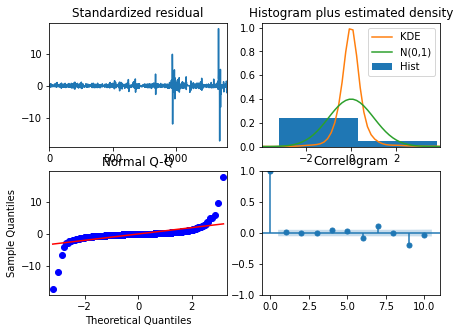

In [514]:
ord_num_o.plot_diagnostics(figsize=(7,5))
plt.show()

In [516]:
X = stat1.values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()


# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,5))
    model_fit = model.fit()
    
    output = model_fit.forecast(dynamic=False)
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)


predicted=1712.557255, expected=2170.000000
predicted=2340.067945, expected=1820.000000
predicted=1813.129448, expected=3419.000000
predicted=3246.384729, expected=4212.000000
predicted=3204.730709, expected=4496.000000
predicted=3417.778328, expected=4026.000000
predicted=3071.126314, expected=7663.000000
predicted=6227.755882, expected=5325.000000
predicted=3187.587734, expected=3658.000000
predicted=3300.043117, expected=5749.000000
predicted=5269.449372, expected=2301.000000
predicted=1922.263435, expected=1561.000000
predicted=2796.073640, expected=1455.000000
predicted=2143.075676, expected=1437.000000
predicted=2352.059793, expected=659.000000
predicted=1507.346344, expected=793.000000
predicted=1815.042148, expected=1862.000000
predicted=2376.449187, expected=1670.000000
predicted=1950.322298, expected=1432.000000
predicted=1954.470065, expected=1004.000000
predicted=1566.704367, expected=1989.000000
predicted=2420.246437, expected=929.000000
predicted=1230.037210, expected=893

predicted=839.435060, expected=468.000000
predicted=638.947612, expected=573.000000
predicted=780.224936, expected=547.000000
predicted=679.014707, expected=1041.000000
predicted=1073.356714, expected=721.000000
predicted=682.681662, expected=657.000000
predicted=794.926713, expected=685.000000
predicted=749.497008, expected=467.000000
predicted=594.707209, expected=691.000000
predicted=809.071435, expected=957.000000
predicted=907.086055, expected=1557.000000
predicted=1329.377151, expected=779.000000
predicted=621.182645, expected=623.000000
predicted=798.021673, expected=594.000000
predicted=671.568116, expected=399.000000
predicted=565.085418, expected=588.000000
predicted=731.604869, expected=823.000000
predicted=821.688768, expected=807.000000
predicted=781.744744, expected=835.000000
predicted=823.932022, expected=864.000000
predicted=827.970137, expected=797.000000
predicted=781.035101, expected=312.000000
predicted=440.506081, expected=425.000000
predicted=636.653292, expected

predicted=1382.671660, expected=897.000000
predicted=1209.746455, expected=1027.000000
predicted=1231.862798, expected=892.000000
predicted=1011.815347, expected=552.000000
predicted=774.059589, expected=777.000000
predicted=952.978700, expected=985.000000
predicted=1055.184155, expected=1237.000000
predicted=1290.109734, expected=866.000000
predicted=923.980795, expected=1058.000000
predicted=1115.174138, expected=1059.000000
predicted=1041.797707, expected=703.000000
predicted=761.646846, expected=618.000000
predicted=740.447881, expected=1049.000000
predicted=1053.295383, expected=2036.000000
predicted=1910.905961, expected=2467.000000
predicted=2240.652779, expected=736.000000
predicted=719.409405, expected=399.000000
predicted=586.787390, expected=291.000000
predicted=316.909956, expected=560.000000
predicted=686.397152, expected=668.000000
predicted=833.151622, expected=703.000000
predicted=768.438950, expected=811.000000
predicted=844.875465, expected=609.000000
predicted=608.76

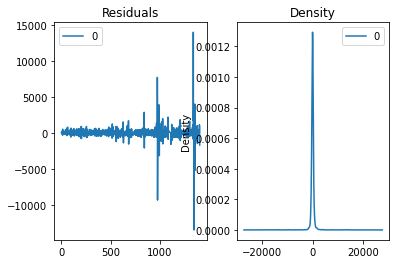

In [517]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

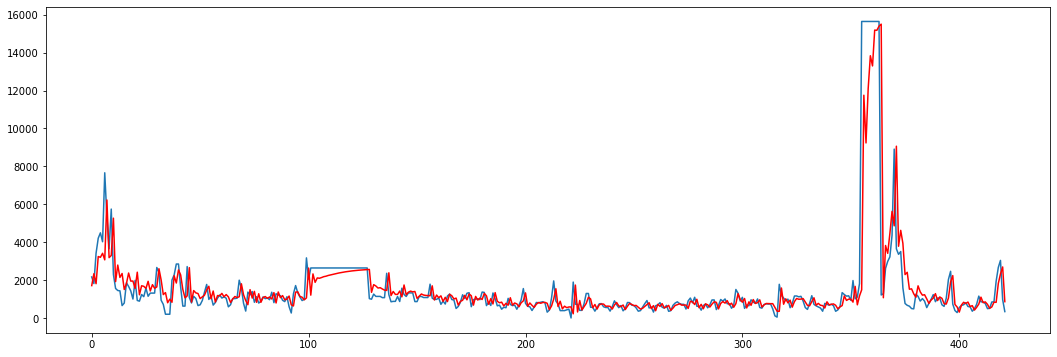

In [518]:
plt.figure(figsize=(18, 6))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [519]:
y = stat2.values
size = int(len(y) * 0.70)
train, test = y[0:size], y[size:len(y)]
history = [y for y in train]
predictions = list()


# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,3))
    model_fit = model.fit()
    output = model_fit.forecast(dynamic=False)
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)


predicted=60583.710861, expected=1502.000000
predicted=44462.699603, expected=12242.000000
predicted=52874.493976, expected=170898.000000
predicted=109454.157298, expected=219523.000000
predicted=121056.679658, expected=124333.000000
predicted=96121.292345, expected=50102.000000
predicted=70278.393738, expected=26009.000000
predicted=60535.124775, expected=3451.000000
predicted=47989.971686, expected=9266.000000
predicted=51658.036070, expected=116995.000000
predicted=90700.885496, expected=79355.000000
predicted=67971.419060, expected=18697.000000
predicted=59445.736910, expected=9549.000000
predicted=46256.380452, expected=102884.000000
predicted=89068.861114, expected=740.000000
predicted=31658.765275, expected=19759.000000
predicted=67785.321261, expected=4343.000000
predicted=28616.501625, expected=38490.000000
predicted=71492.261851, expected=212156.000000
predicted=111614.629535, expected=60589.000000
predicted=61525.730755, expected=265769.000000
predicted=161564.067745, expect

predicted=51010.160088, expected=59834.000000
predicted=59611.115788, expected=74751.000000
predicted=60846.001288, expected=223317.000000
predicted=110069.632399, expected=464.000000
predicted=30445.722811, expected=5289.000000
predicted=55965.732903, expected=12381.000000
predicted=44798.858718, expected=61348.000000
predicted=62061.529097, expected=79178.000000
predicted=61339.732094, expected=69337.000000
predicted=61069.803844, expected=80870.000000
predicted=65935.157279, expected=508.000000
predicted=39367.968475, expected=3662.000000
predicted=46720.941706, expected=54731.000000
predicted=57796.839621, expected=31922.000000
predicted=46228.098198, expected=43478.000000
predicted=53379.326357, expected=5721.000000
predicted=38571.708979, expected=63871.000000
predicted=60140.789680, expected=542.000000
predicted=33298.725144, expected=3516.000000
predicted=41152.614152, expected=118708.000000
predicted=73231.283959, expected=185290.000000
predicted=87667.573110, expected=29320.0

predicted=39155.449263, expected=2986.000000
predicted=38436.333859, expected=2986.000000
predicted=37447.954632, expected=2986.000000
predicted=36807.452907, expected=2986.000000
predicted=36159.886167, expected=2986.000000
predicted=35676.404519, expected=2986.000000
predicted=35225.479067, expected=2986.000000
predicted=34842.050075, expected=791.000000
predicted=33779.361977, expected=1218.000000
predicted=33620.946866, expected=1867.000000
predicted=33319.965818, expected=170230.000000
predicted=86542.300502, expected=144381.000000
predicted=75537.103291, expected=3483.000000
predicted=46036.975315, expected=38844.000000
predicted=61828.741962, expected=1933.000000
predicted=42331.671826, expected=313603.000000
predicted=143148.954125, expected=94192.000000
predicted=64157.573672, expected=115739.000000
predicted=100774.139468, expected=223008.000000
predicted=121547.105510, expected=107846.000000
predicted=90466.762508, expected=107728.000000
predicted=100094.670328, expected=529

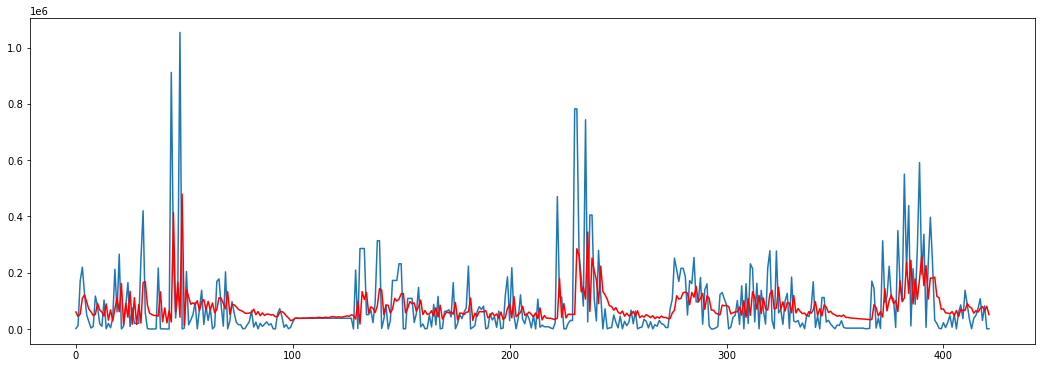

In [520]:
plt.figure(figsize=(18, 6))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## Train_model using FB_prophet

#### Structuring our data to suit the prophet model

In [336]:
#changing date to column
stat1.reset_index(inplace=True)
stat2.reset_index(inplace=True)

In [337]:
stat1.rename(columns = {'date':'ds','ORDNUM':'y'}, inplace = True)
stat1.head(4)

,ds,y
0,2018-03-13,66.0
1,2018-03-14,95.0
2,2018-03-15,39.0
3,2018-03-16,5.0


In [338]:
stat2.rename(columns = {'date':'ds','ORDQTY':'y'}, inplace = True)
stat2.head(4)

,ds,y
0,2018-03-13,2491
1,2018-03-14,1398
2,2018-03-15,156
3,2018-03-16,111


In [339]:
stat2.columns

Index(['ds', 'y'], dtype='object')

In [420]:
new_ordnum = stat1[stat1['y'] <=2000]
new_ordqnt = stat2[stat2['y'] <=2000]

In [421]:
## defining holidays in Czech so as to include in our model

In [422]:
class Czechia(HolidayBase):
    # https://en.wikipedia.org/wiki/Public_holidays_in_the_Czech_Republic

    country = "CZ"

    def __init__(self, **kwargs):
        HolidayBase.__init__(self, **kwargs)

    def _populate(self, year):
        self[date(year, JAN, 1)] = (
            "Den obnovy samostatného českého" " státu"
            if year >= 2000
            else "Nový rok"
        )

        e = easter(year)
        if year <= 1951 or year >= 2016:
            self[e - rd(days=2)] = "Velký pátek"
        self[e + rd(days=1)] = "Velikonoční pondělí"

        if year >= 1951:
            self[date(year, MAY, 1)] = "Svátek práce"
        if year >= 1992:
            self[date(year, MAY, 8)] = "Den vítězství"
        elif year >= 1947:
            self[date(year, MAY, 9)] = (
                "Den vítězství nad hitlerovským" " fašismem"
            )
        if year >= 1951:
            self[date(year, JUL, 5)] = (
                "Den slovanských věrozvěstů " "Cyrila a Metoděje"
            )
            self[date(year, JUL, 6)] = "Den upálení mistra Jana Husa"
        if year >= 2000:
            self[date(year, SEP, 28)] = "Den české státnosti"
        if year >= 1951:
            self[date(year, OCT, 28)] = (
                "Den vzniku samostatného " "československého státu"
            )
        if year >= 1990:
            self[date(year, NOV, 17)] = "Den boje za svobodu a demokracii"

        if year >= 1990:
            self[date(year, DEC, 24)] = "Štědrý den"
        if year >= 1951:
            self[date(year, DEC, 25)] = "1. svátek vánoční"
            self[date(year, DEC, 26)] = "2. svátek vánoční"


class CZ(Czechia):
    pass


class CZE(Czechia):
    pass


In [423]:
## creating models using 80% of our data

In [424]:
model_1= Prophet(interval_width = 0.95,daily_seasonality = True,yearly_seasonality=True, weekly_seasonality=True, changepoint_prior_scale=2) 
model_1.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)

model_2 = Prophet(interval_width = 0.95,daily_seasonality = True,yearly_seasonality=True, weekly_seasonality=True,  changepoint_prior_scale=2) 
model_2.add_seasonality(name="monthly", period=30.5, fourier_order=5, prior_scale=0.02)

m3 = Prophet(interval_width = 0.95,daily_seasonality = True,yearly_seasonality=True, weekly_seasonality=True, changepoint_prior_scale=2) 
m3.add_seasonality(name="monthly", period=30.5, fourier_order=5, prior_scale=0.02)

m4 = Prophet(interval_width = 0.95,daily_seasonality = True,yearly_seasonality=True, weekly_seasonality=True, changepoint_prior_scale=2) 
m4.add_seasonality(name="monthly", period=30.5, fourier_order=5, prior_scale=0.02)


In [425]:
model_ord_num = model_1.fit(stat1)

In [426]:
model_ord_qnt = model_2.fit(stat2)

In [427]:
model_num = m3.fit(new_ordnum)

In [428]:
model_qnt= m4.fit(new_ordqnt)

## Forecast

In [429]:
predicted_ord_num = model_1.make_future_dataframe(periods=150, freq='D')
future_ord = model_1.predict(predicted_ord_num)

In [430]:
predicted_ord_qnt = model_2.make_future_dataframe(periods=150, freq='D')
future_ord_qnt = model_2.predict(predicted_ord_qnt)

In [431]:
## removed outliers 

In [432]:
predicted_num = m3.make_future_dataframe(periods=150, freq='D')
future_num= m3.predict(predicted_num)

In [433]:
predicted_num = m4.make_future_dataframe(periods=150, freq='D')
future_qnt= m4.predict(predicted_num)

In [434]:
## ploting

<Figure size 1440x720 with 0 Axes>

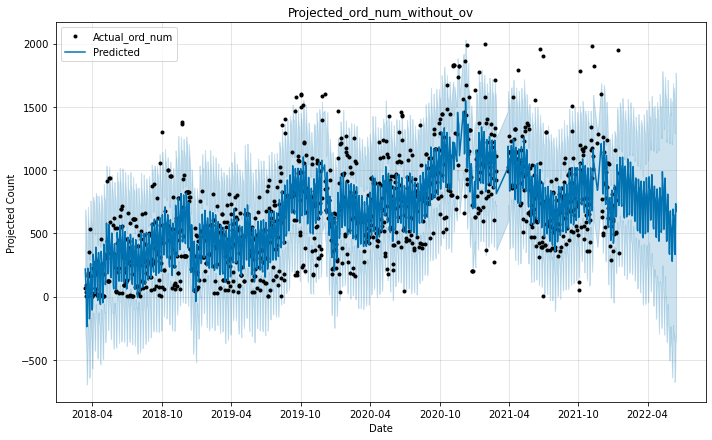

In [435]:
plt.figure(figsize=(20, 10))
m3.plot(future_num , xlabel = 'Date', ylabel = 'Projected Count')
plt.title('Projected_ord_num_without_ov')
plt.legend(['Actual_ord_num', 'Predicted']);

<Figure size 1296x432 with 0 Axes>

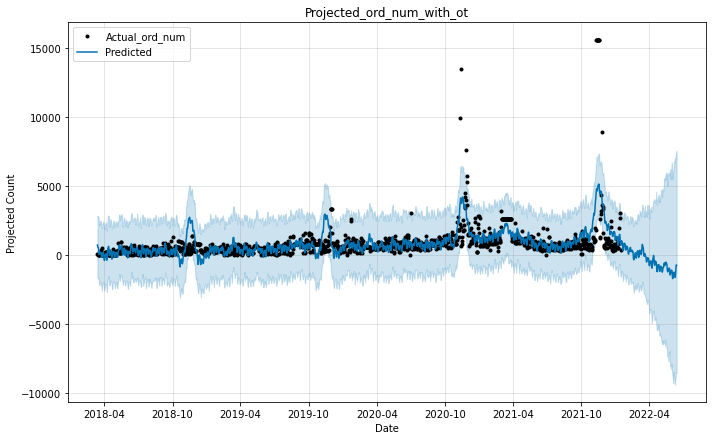

In [436]:
plt.figure(figsize=(18, 6))
model_1.plot(future_ord , xlabel = 'Date', ylabel = 'Projected Count')
plt.title('Projected_ord_num_with_ot')
plt.legend(['Actual_ord_num', 'Predicted']);

In [437]:
# the above graph  can be better by cutting out outliers 

In [438]:
future_ord_qnt.tail(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1553,2022-06-13,68129.981095,-373031.465727,466236.275612,-333194.626058,458407.513200,-23083.354231,-23083.354231,-23083.354231,4712.194408,...,-8883.856743,-8883.856743,-8883.856743,-14633.903155,-14633.903155,-14633.903155,0.0,0.0,0.0,45046.626864
1554,2022-06-14,68097.405851,-343245.727222,526210.139404,-336051.144595,461690.622625,15527.368976,15527.368976,15527.368976,4712.194408,...,26295.209203,26295.209203,26295.209203,-14833.740645,-14833.740645,-14833.740645,0.0,0.0,0.0,83624.774827
1555,2022-06-15,68064.830607,-353970.648705,480415.525616,-339527.552150,464971.905203,7682.597316,7682.597316,7682.597316,4712.194408,...,10691.094085,10691.094085,10691.094085,-14947.851298,-14947.851298,-14947.851298,0.0,0.0,0.0,75747.427922


<Figure size 1296x432 with 0 Axes>

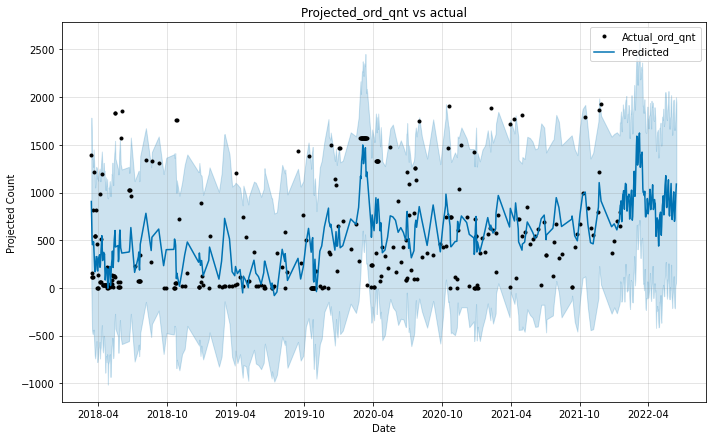

In [440]:
plt.figure(figsize=(18, 6))
m4.plot(future_qnt, xlabel = 'Date', ylabel = 'Projected Count')
plt.title('Projected_ord_qnt vs actual')
plt.legend(['Actual_ord_qnt', 'Predicted']);

<Figure size 1296x432 with 0 Axes>

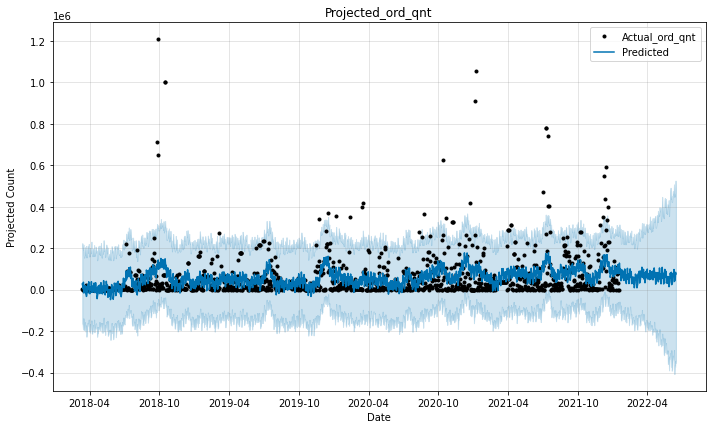

In [441]:
plt.figure(figsize=(18, 6))
model_2.plot(future_ord_qnt, xlabel = 'Date', ylabel = 'Projected Count')
plt.title('Projected_ord_qnt')
plt.legend(['Actual_ord_qnt', 'Predicted']);

In [442]:
## ploting the trend  lets see if the prophet saw a trend we couldnt realize 

Text(0.5, 0, 'date/year ')

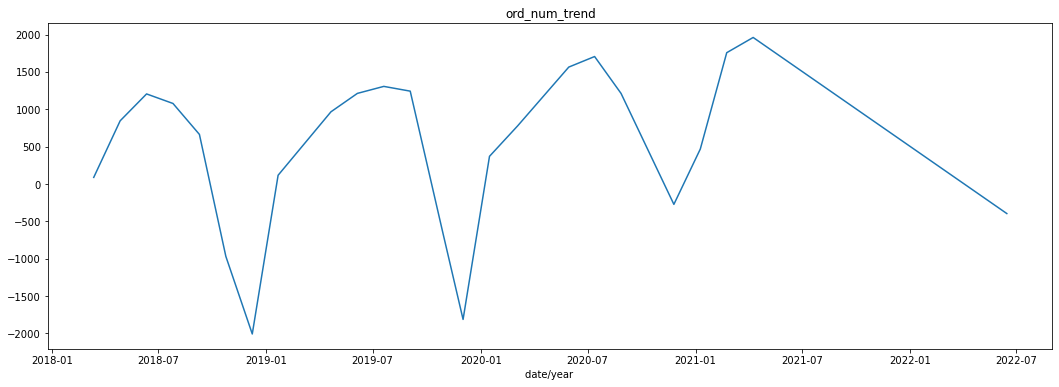

In [443]:
plt.figure(figsize=(18, 6))
plt.plot(future_ord.ds,future_ord.trend)
plt.title('ord_num_trend')
plt.xlabel('date/year ')

Text(0.5, 0, 'date/year ')

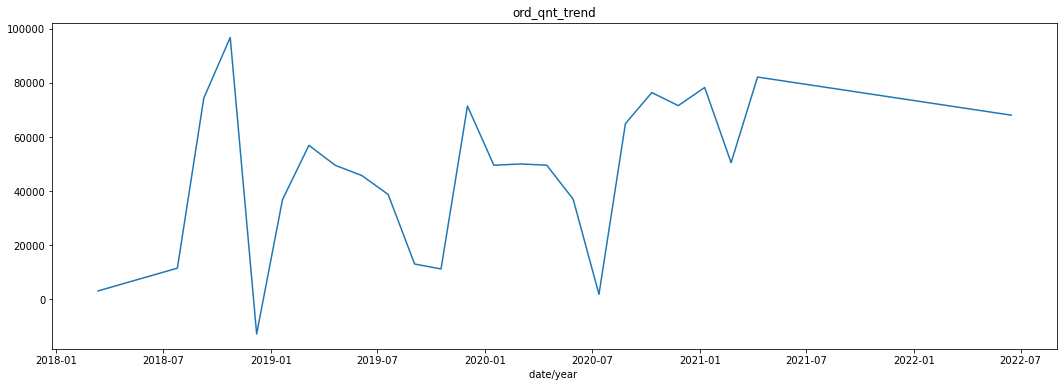

In [444]:
plt.figure(figsize=(18, 6))
plt.plot(future_ord_qnt.ds,future_ord_qnt.trend)
plt.title('ord_qnt_trend')
plt.xlabel('date/year ')

Text(0.5, 0, 'date/year ')

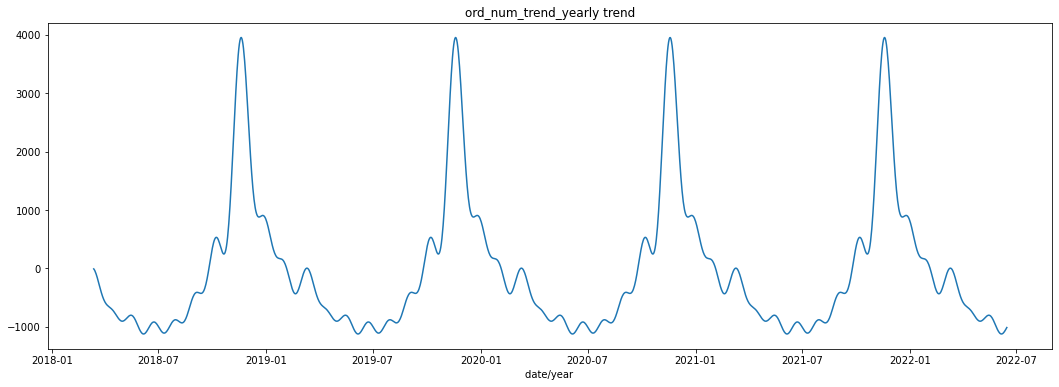

In [445]:
plt.figure(figsize=(18, 6))
plt.plot(future_ord.ds,future_ord.yearly)
plt.title('ord_num_trend_yearly trend')
plt.xlabel('date/year ')

Text(0.5, 0, 'date/year ')

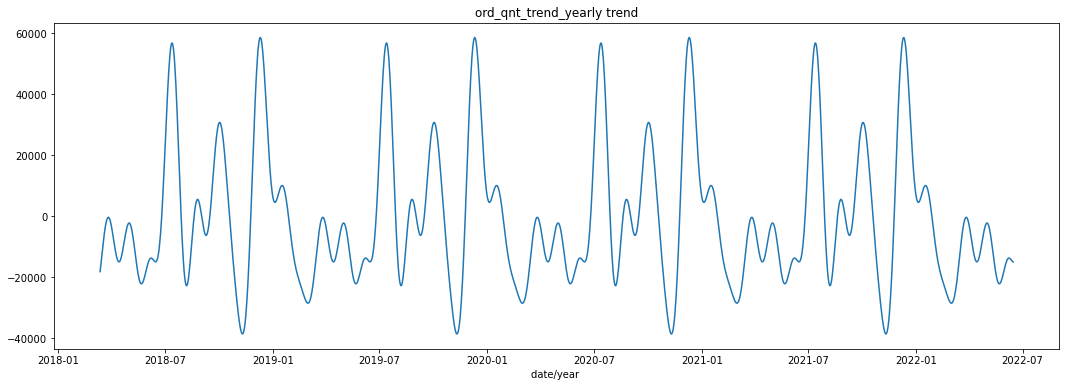

In [446]:
plt.figure(figsize=(18, 6))
plt.plot(future_ord_qnt.ds,future_ord_qnt.yearly)
plt.title('ord_qnt_trend_yearly trend')
plt.xlabel('date/year ')

In [447]:
## there is a yearly  trend in our data which i cant find a coherent story to tell why the algorithm thinks so 

In [448]:
## how about a monthly trend

Text(0.5, 0, 'date/year ')

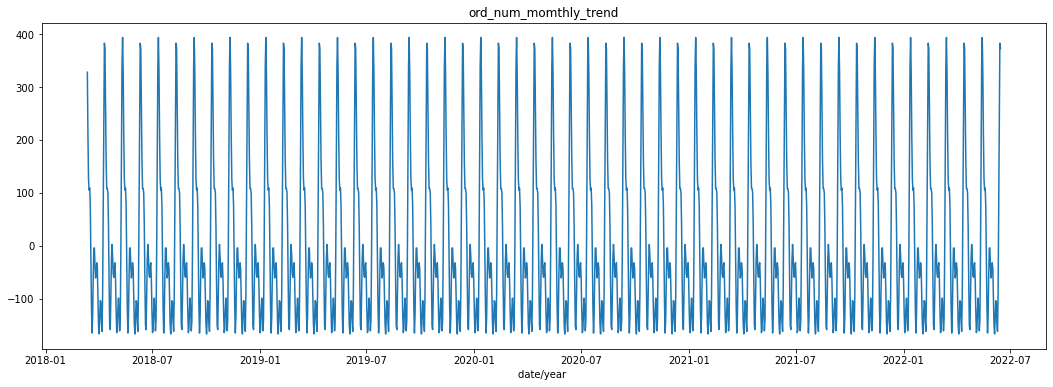

In [449]:
plt.figure(figsize=(18, 6))
plt.plot(future_ord.ds,future_ord.monthly)
plt.title('ord_num_momthly_trend')
plt.xlabel('date/year ')

In [450]:
# what about weekly trend

Text(0.5, 0, 'date/year ')

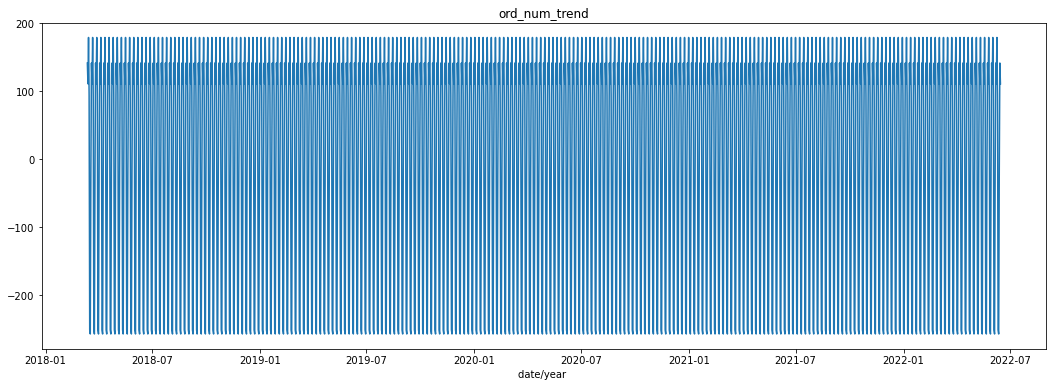

In [451]:
plt.figure(figsize=(18, 6))
plt.plot(future_ord.ds,future_ord.weekly)
plt.title('ord_num_trend')
plt.xlabel('date/year ')

In [95]:
## there is no weekly trend  but the graph can be made better by week selection and grouping but same result will be obtained 

### opinion: 
###### our data is biased for one we have only from 2018 till 2021 and during covid lockdown we had increased number  of online orders and this
###### is a part that our algorithm cannot tell, and clearly looking at the data we see 2018 had the most number of orders and the peek being 2020


### objective 
###### the main idea is to make a model that will stand test of time but how?
###### there are many other methods to look out for 



## Accuracy test

In [ ]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)


## Now we have a model so what ??

In [ ]:
## how to make the model continously learn from new data and update 
